In [162]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

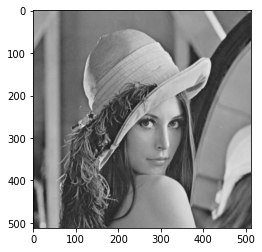

In [163]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

True

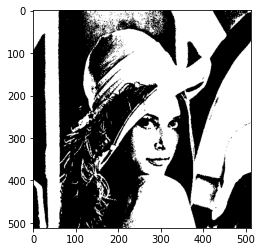

In [164]:
def binarize(lena, thr=128):
    after = copy.deepcopy(lena)
    for r in range(after.shape[0]):
        for c in range(after.shape[1]):
            if (after[r][c] < thr) : after[r][c] = 0
            else: after[r][c] = 255
    return after
bina = binarize(lena)
plt.imshow(bina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('binarize lena.bmp',bina)
cv2.imwrite('binarize lena.png',bina)

In [165]:
oct_kernel = [(-2, -1), (-2, 0), (-2, 1),
              (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2),
              (0, -2), (0, -1), (0, 0), (0, 1), (0, 2),
              (1, -2), (1, -1), (1, 0), (1, 1), (1, 2),
              (2, -1), (2, 0), (2, 1)]

True

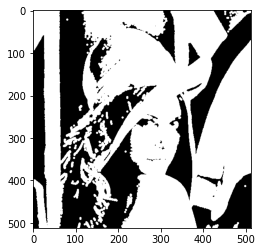

In [166]:
def dilation(bina, kernel):
    after = copy.deepcopy(bina)
    for r in range(bina.shape[0]):
        for c in range(bina.shape[1]):
            # For White Only
            if (bina[r][c] == 255):
                for k in kernel:
                    # Check Bound
                    if (r + k[0] >= 0 and r + k[0] < bina.shape[0] and 
                        c + k[1] >= 0 and c + k[1] < bina.shape[1]):
                        after[r + k[0]][c + k[1]] = 255
    return after
dina = dilation(bina, oct_kernel)
plt.imshow(dina, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('dilation-lena.bmp',dina)
cv2.imwrite('dilation-lena.png',dina)

True

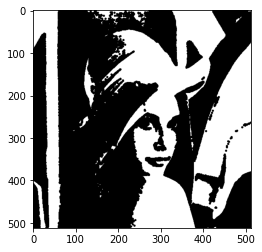

In [167]:
def erosion(bina, kernel):
    after = copy.deepcopy(bina)
    for r in range(bina.shape[0]):
        for c in range(bina.shape[1]):
            # Assume it will be white
            after[r][c] = 255
            for k in kernel:
                # Check Bound
                if (r + k[0] >= 0 and r + k[0] < bina.shape[0] and 
                    c + k[1] >= 0 and c + k[1] < bina.shape[1]):
                    if (bina[r + k[0]][c + k[1]] != 255):
                        after[r][c] = 0
                        break
    return after
erna = erosion(bina, oct_kernel)
plt.imshow(erna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('erosion-lena.bmp',erna)
cv2.imwrite('erosion-lena.png',erna)

True

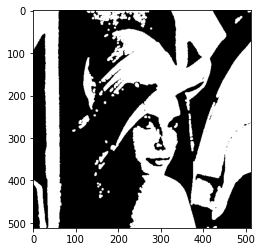

In [168]:
def opening(bina, kernel):
    return dilation(erosion(bina, kernel), kernel)
opna = opening(bina, oct_kernel)
plt.imshow(opna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('opening-lena.bmp',opna)
cv2.imwrite('opening-lena.png',opna)

True

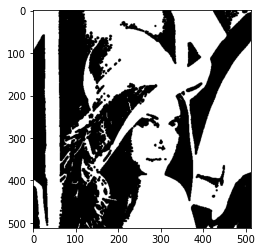

In [169]:
def closing(bina, kernel):
    return erosion(dilation(bina, kernel), kernel)
clna = closing(bina, oct_kernel)
plt.imshow(clna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('closing-lena.bmp',clna)
cv2.imwrite('closing-lena.png',clna)

In [170]:
L_kernel_J = [(0, -1), (0, 0), (1, 0)]
L_kernel_K = [(-1, 0), (-1, 1), (0, 1)]

True

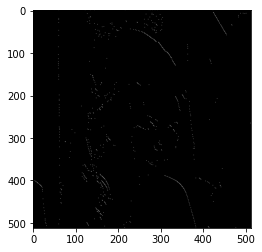

In [172]:
def hit_and_miss(bina, kernel_1, kernel_2):
    # Get bina's complement
    c_bina = 255 - bina
    # Do erosion 
    AJ = erosion(bina, kernel_1)
    AcK = erosion(c_bina, kernel_2)
    # Get Intersection
    after = copy.deepcopy(bina)
    for r in range(bina.shape[1]):
        for c in range(bina.shape[1]):
            if AJ[r][c] == AcK[r][c]:
                after[r][c] = AJ[r][c]
            else:
                after[r][c] = 0
    return after
hmna = hit_and_miss(bina, L_kernel_J, L_kernel_K)
plt.imshow(hmna, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('hit-and-miss-lena.bmp',hmna)
cv2.imwrite('hit-and-miss-lena.png',hmna)